# Task 2 - To Explore Supervised Machine Learning

# Problem Statement : In this regression task we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing important libraries :-

In [35]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

# Reading file from remote link :-

In [81]:
datapath=  "http://bit.ly/w-data"
data = pd.read_csv(datapath)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [69]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking null values :-

In [49]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [73]:
#data is clean , ready for EDA

# Exploratory data analysis :- 

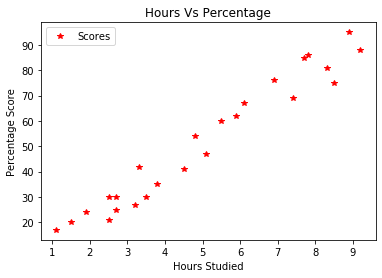

In [77]:
data.plot(x = "Hours" , y = "Scores" , style = "*",color="r")        #plotting the x and y variable
plt.title("Hours Vs Percentage")    #Title of the plot
plt.xlabel("Hours Studied")         #title of x-variable
plt.ylabel("Percentage Score")      #title of y-variable
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


# Preparing data for Training and Testing :-

In [52]:
X = data.iloc[ :, :-1].values
Y = data.iloc[ :, 1].values

# Splitting into train and test :-

In [54]:
import sklearn 
from sklearn.model_selection import train_test_split

In [55]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2 ,random_state = 0)

# Training the algorithm :-

## Building the model on train data :-

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg = LinearRegression()

In [58]:
reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line :-

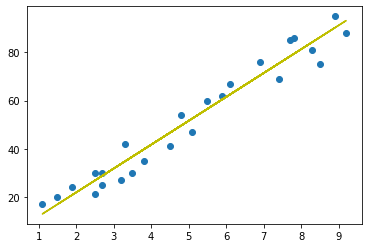

In [78]:
line = reg.coef_*X+reg.intercept_  #Formula for line : y = mx + c

#Plot for test data
plt.scatter(X, Y)
plt.plot(X, line , color= "y");
plt.show()

# Prediction :-

# Prediction has to be done on test data :-

In [60]:
pred_value = reg.predict(X_test)
pred_value

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Create a dataframe with "Actual" and "Predicted" values :-

In [61]:
df = pd.DataFrame({ "Actual" : Y_test   ,
                    "Predicted" : pred_value})

In [62]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
# We can also test with our own data

hours = np.array([9.25])

hours = hours.reshape(-1 , 1)

own_pred = reg.predict(hours)

print("No of Hours = {}".format(hours))

print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# R-square :-

In [64]:
reg.score(X_train, Y_train)  

0.9515510725211553

# Adjusted R-Square :-

In [65]:
X_train.shape

(20, 1)

In [66]:
k = 1
N = 20

Rsq= reg.score(X_train, Y_train)

AdR_Square= 1- (1-Rsq)*(N-1) / (N-k-1)

print("R Square value is ....",Rsq)
print("Adjusted R Square value is ....",AdR_Square)

R Square value is .... 0.9515510725211553
Adjusted R Square value is .... 0.9488594654389974


# Model Evaluation :-

In [30]:
from sklearn import metrics  

In [68]:
print('Mean Absolute Error:',  metrics.mean_absolute_error(Y_test, pred_value))

print('Mean Squared Error:',  metrics.mean_squared_error(Y_test, pred_value)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test , pred_value))) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# ***************************THE END *************************

# NAME :- shreyans konda 